In [1]:
import pandas as pd 

In [ ]:
# pip install openpyxl

                                              0.0/250.9 kB ? eta -:--:--
     -------                                 51.2/250.9 kB 1.3 MB/s eta 0:00:01
     -------                                 51.2/250.9 kB 1.3 MB/s eta 0:00:01
     -------                                 51.2/250.9 kB 1.3 MB/s eta 0:00:01
     -----------------                    122.9/250.9 kB 722.1 kB/s eta 0:00:01
     ------------------------             174.1/250.9 kB 751.6 kB/s eta 0:00:01
     ---------------------------          194.6/250.9 kB 695.5 kB/s eta 0:00:01
     --------------------------------     225.3/250.9 kB 655.6 kB/s eta 0:00:01
     ------------------------------------ 250.9/250.9 kB 641.8 kB/s eta 0:00:00


In [32]:
data = pd.read_excel("D:\EarthRenewal.AI\Dataset\iot-data.csv (2).xlsx")

In [33]:
data.head()

,air_temperature,soil_temperature,humidity,moisture,nitrogen,phosphorous,potassium,timestamp
0,28.9,26.81,42.0,0.0,NaN,NaN,NaN,2.023112e+13
1,28.9,26.81,63.0,0.0,NaN,NaN,NaN,2.023112e+13
2,28.9,26.81,63.0,0.0,NaN,NaN,NaN,2.023112e+13
3,28.9,26.81,62.0,0.0,NaN,NaN,NaN,2.023112e+13
4,28.9,26.81,62.0,0.0,NaN,NaN,NaN,2.023112e+13


In [34]:
data.isna().sum()

air_temperature      49
soil_temperature     64
humidity             62
moisture            360
nitrogen            229
phosphorous         233
potassium           236
timestamp            86
dtype: int64

In [35]:
data.drop(['timestamp'], axis= 1, inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   air_temperature   10951 non-null  float64
 1   soil_temperature  10936 non-null  float64
 2   humidity          10938 non-null  float64
 3   moisture          10640 non-null  float64
 4   nitrogen          10771 non-null  float64
 5   phosphorous       10767 non-null  float64
 6   potassium         10764 non-null  float64
dtypes: float64(7)
memory usage: 601.7 KB


In [37]:
data.fillna(data.mean(), inplace=True)

In [38]:
datas = data.copy()

In [ ]:
# !pip install seaborn

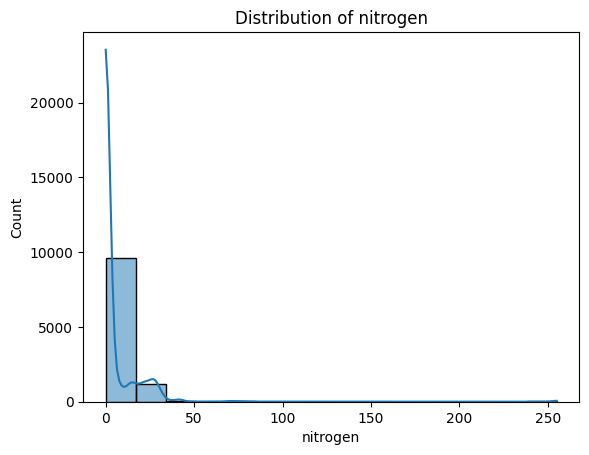

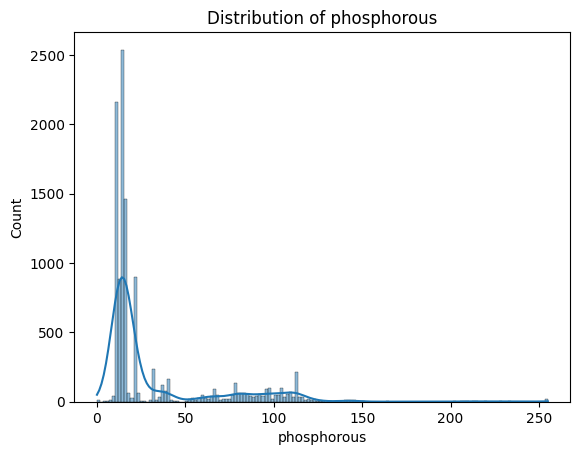

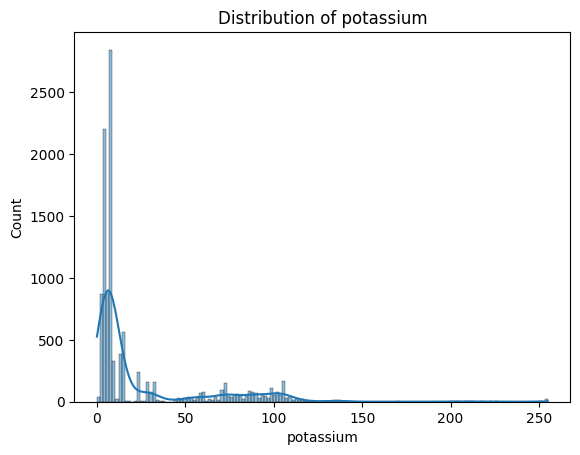

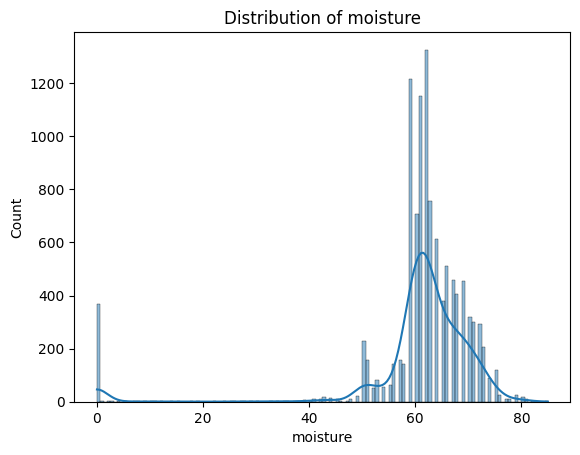

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms
for col in ["nitrogen", "phosphorous", "potassium", "moisture"]:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [12]:
from sklearn.cluster import KMeans

# Define features
X = data[["air_temperature", "soil_temperature", "humidity", "moisture", "nitrogen", "phosphorous", "potassium"]]

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
clusters = kmeans.fit_predict(X)

data['soil_health_cluster'] = clusters  # Add cluster labels to your dataset


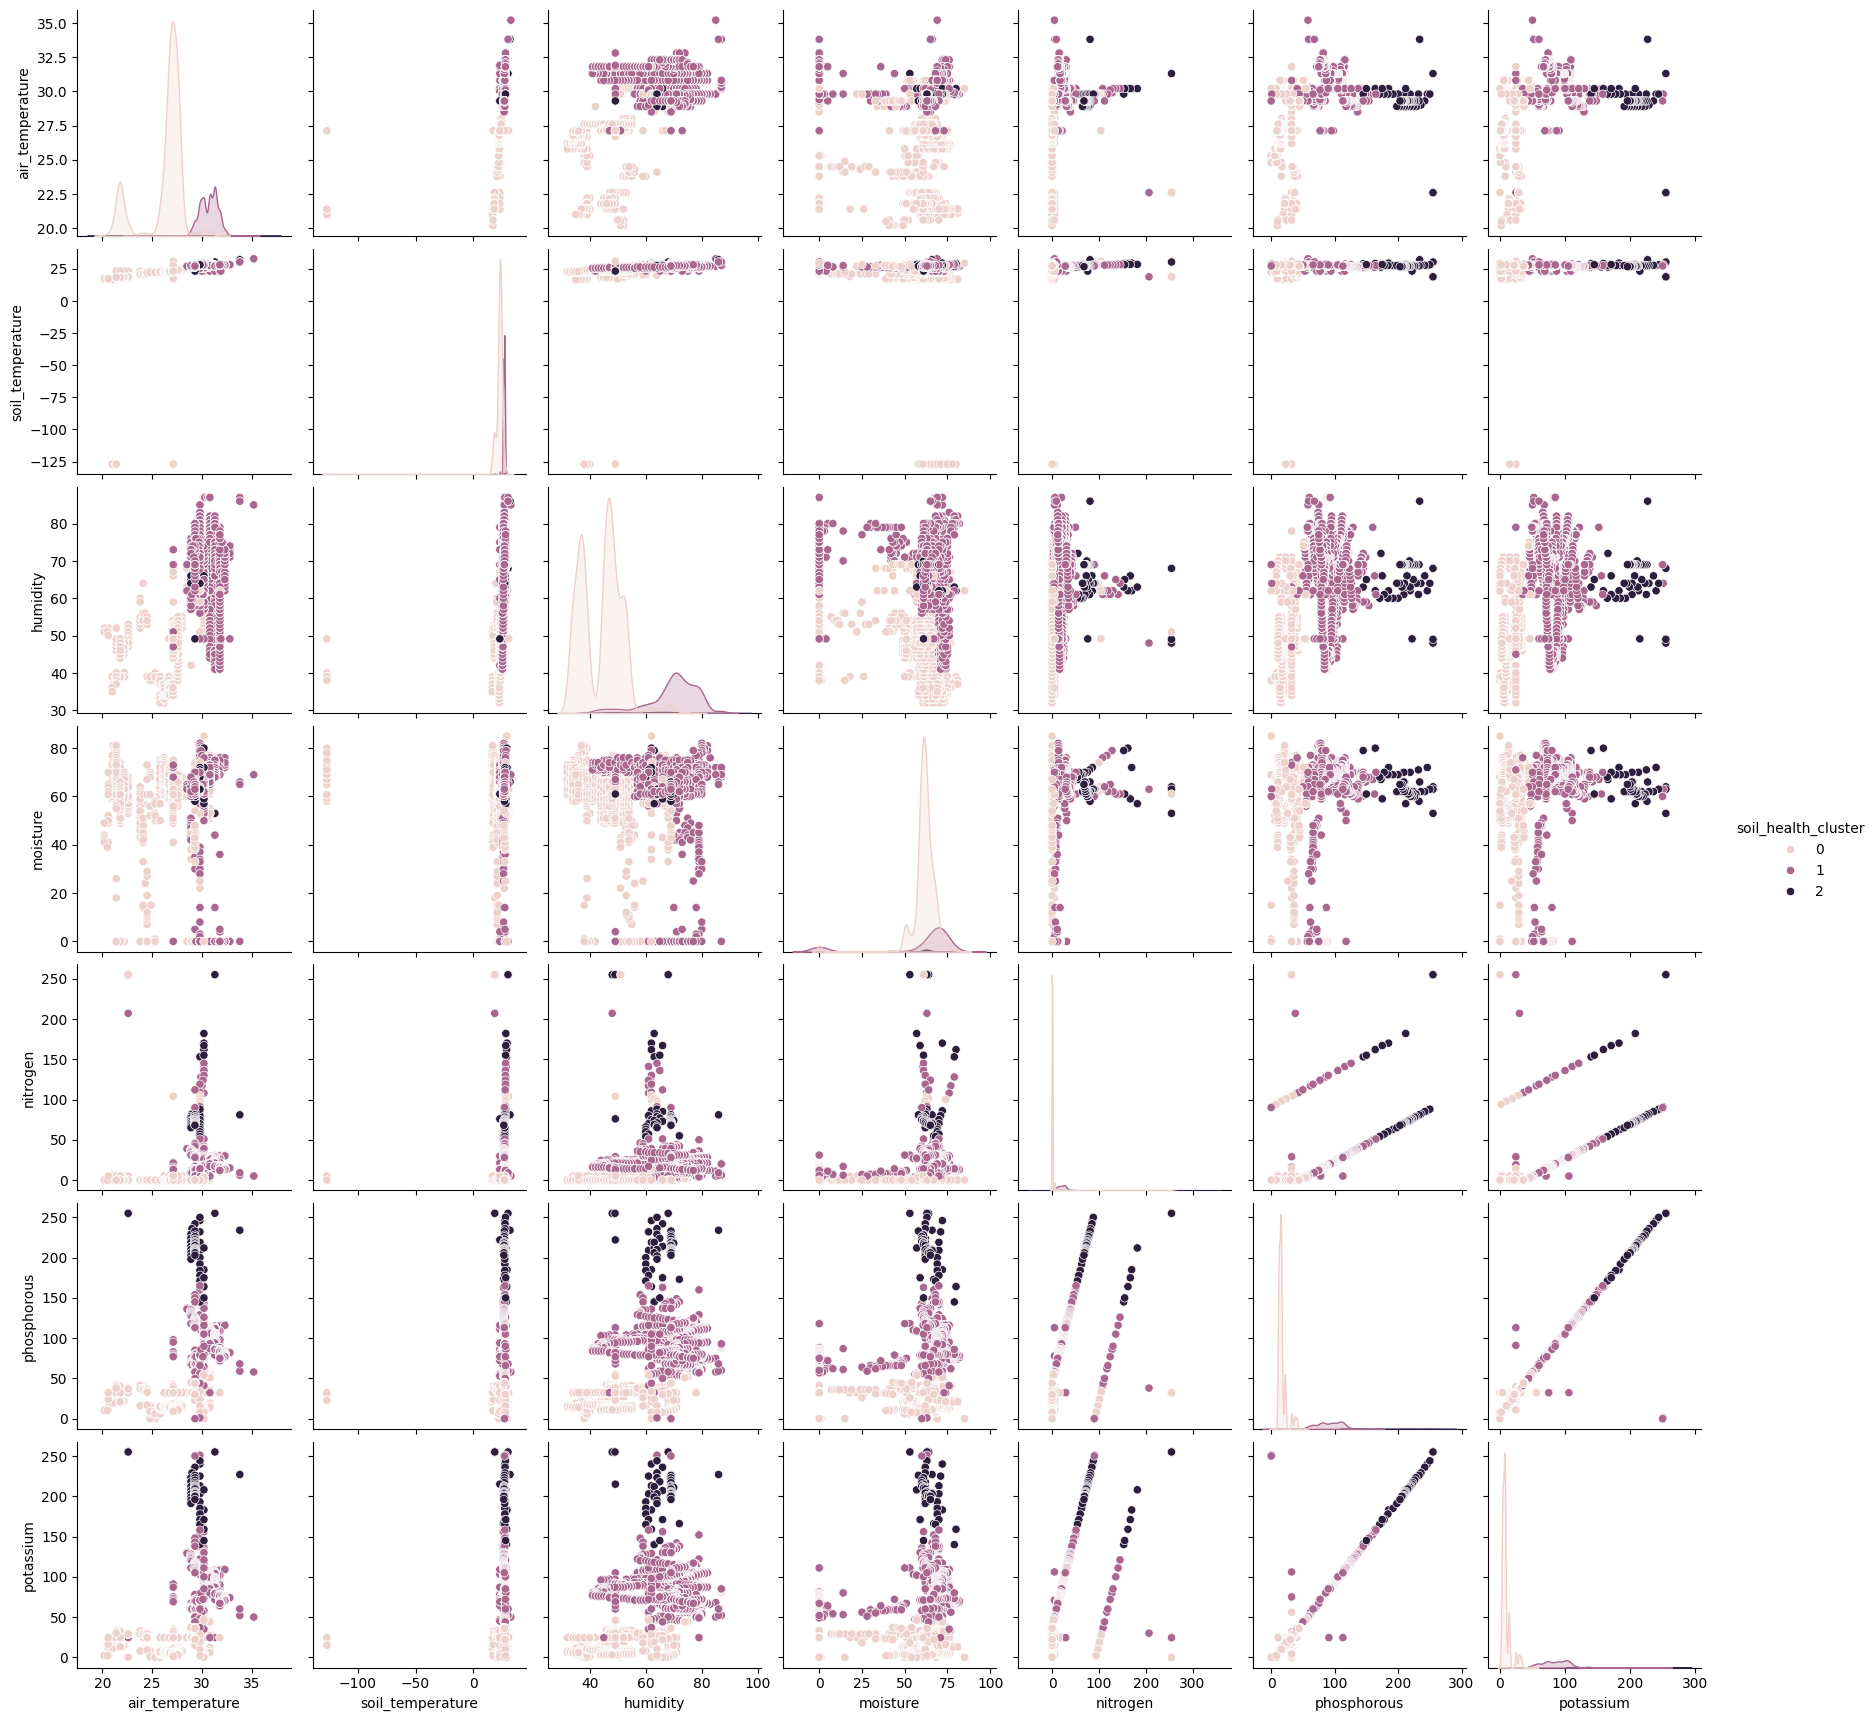

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot of features
sns.pairplot(data, hue="soil_health_cluster")  # If clustering was applied
plt.show()


In [15]:
from sklearn.metrics import silhouette_score

# Assuming 'clusters' is the result of your clustering
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.7898570066278552


In [16]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(X, clusters)
print(f"Calinski-Harabasz Index: {score}")


Calinski-Harabasz Index: 22445.2677387941


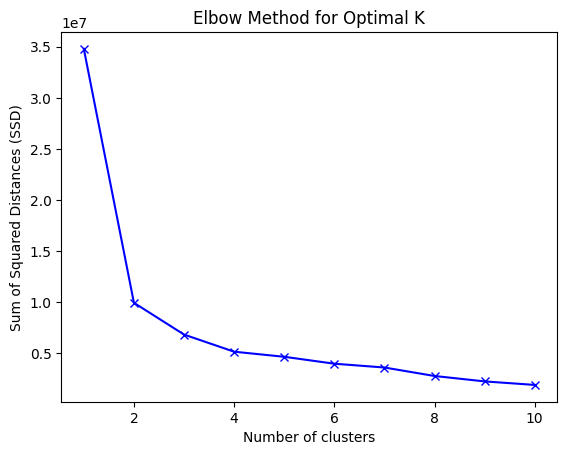

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ssd = []
K = range(1, 11)  # Try 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot SSD vs Number of Clusters
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal K')
plt.show()


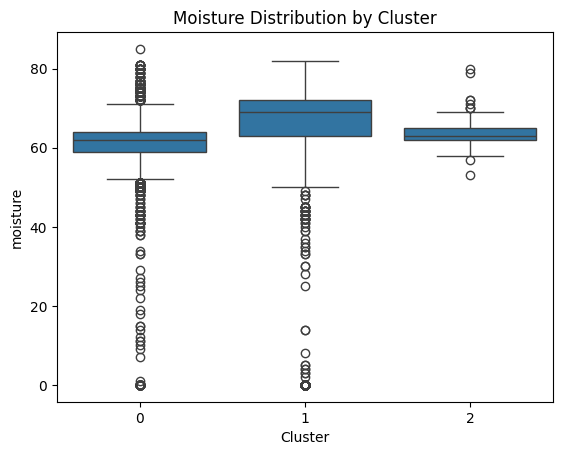

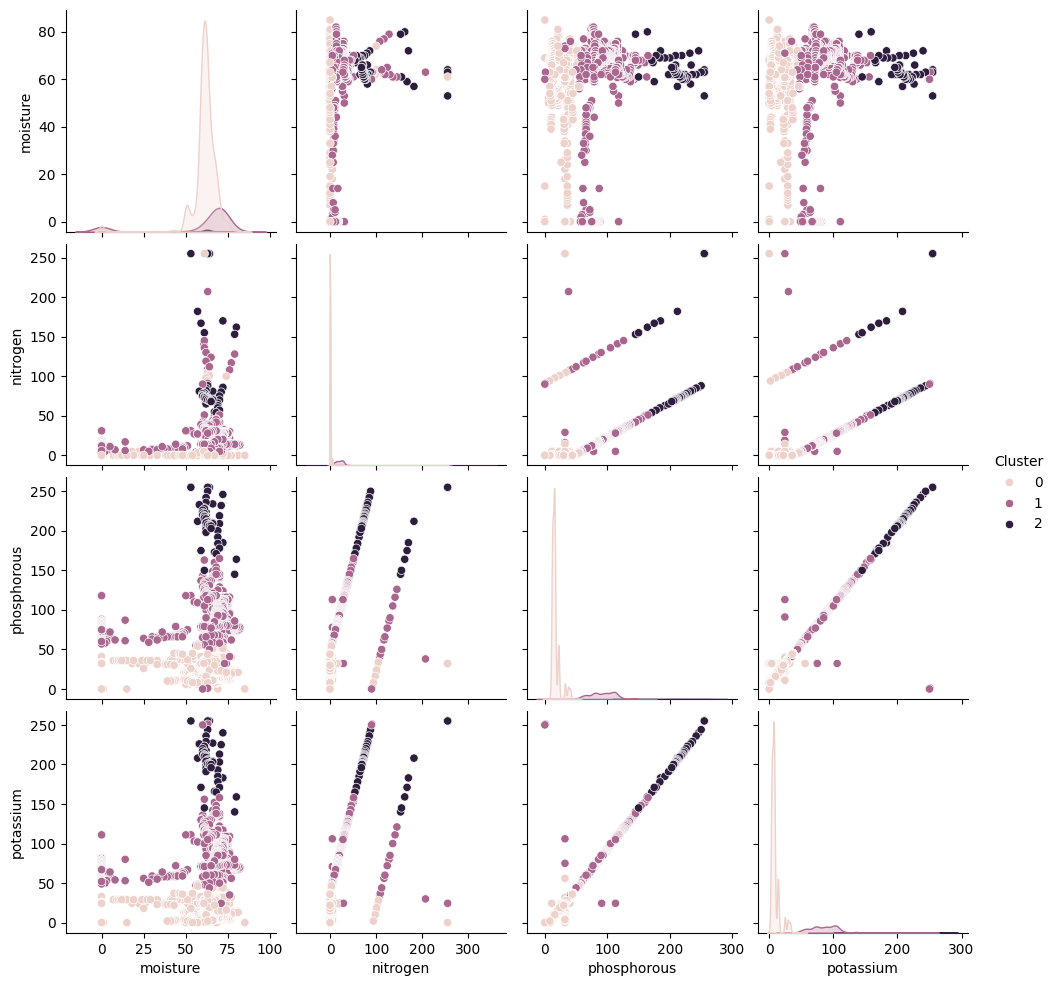

In [20]:
import seaborn as sns

# Add cluster labels to the DataFrame
data['Cluster'] = clusters

# Plot feature distribution by cluster
sns.boxplot(x='Cluster', y='moisture', data=data)
plt.title('Moisture Distribution by Cluster')
plt.show()

# Pairplot to visualize clusters
sns.pairplot(data, hue='Cluster', vars=["moisture", "nitrogen", "phosphorous", "potassium"])
plt.show()


In [21]:
def classify_nitrogen(value):
    if value < 10:
        return 'Deficient'
    elif 10 <= value <= 20:
        return 'Marginal'
    elif 21 <= value <= 30:
        return 'Adequate'
    else:
        return 'High'

# df['Nitrogen_Status'] = df['nitrogen'].apply(classify_nitrogen)


In [24]:
def classify_phosphorus(value):
    if value < 3:
        return 'Deficient'
    elif 3 <= value <= 7:
        return 'Marginal'
    elif 8 <= value <= 11:
        return 'Adequate'
    else:
        return 'High'


In [25]:
def classify_potassium(value):
    if value < 60:
        return 'Deficient'
    elif 60 <= value <= 120:
        return 'Marginal'
    elif 121 <= value <= 180:
        return 'Adequate'
    else:
        return 'High'


In [26]:
def classify_soil_health(row):
    # Classify nitrogen, phosphorus, and potassium
    nitrogen_status = classify_nitrogen(row['nitrogen'])
    phosphorus_status = classify_phosphorus(row['phosphorous'])
    potassium_status = classify_potassium(row['potassium'])
    
    # If all are adequate or high, it's healthy
    if nitrogen_status == 'Adequate' and phosphorus_status == 'Adequate' and potassium_status == 'Adequate':
        return 'Healthy'
    elif nitrogen_status in ['Deficient', 'Marginal'] or phosphorus_status in ['Deficient', 'Marginal'] or potassium_status in ['Deficient', 'Marginal']:
        return 'Unhealthy'
    else:
        return 'Marginal'

# Apply the function to classify soil health
data['Soil_Health'] = data.apply(classify_soil_health, axis=1)


In [27]:
data.head()

,air_temperature,soil_temperature,humidity,moisture,nitrogen,phosphorous,potassium,soil_health_cluster,Cluster,Soil_Health
0,28.9,26.81,42.0,0.0,4.967691,32.239342,24.444073,0,0,Unhealthy
1,28.9,26.81,63.0,0.0,4.967691,32.239342,24.444073,0,0,Unhealthy
2,28.9,26.81,63.0,0.0,4.967691,32.239342,24.444073,0,0,Unhealthy
3,28.9,26.81,62.0,0.0,4.967691,32.239342,24.444073,0,0,Unhealthy
4,28.9,26.81,62.0,0.0,4.967691,32.239342,24.444073,0,0,Unhealthy


In [29]:
data['Soil_Health'].value_counts()

Soil_Health
Unhealthy    10861
Marginal       139
Name: count, dtype: int64

In [30]:
# Check how many zero values are present in each column
zero_counts = (data == 0).sum()

# Print the result
print(zero_counts)


air_temperature           0
soil_temperature          0
humidity                  0
moisture                370
nitrogen               8586
phosphorous               8
potassium                24
soil_health_cluster    8838
Cluster                8838
Soil_Health               0
dtype: int64


In [39]:
# Replacing zeros with the mean of each column
mean_data = datas.apply(lambda x: x.replace(0, x.mean()) if x.name != 'timestamp' else x)
 

In [41]:
# Check how many zero values are present in each column
zero_counts = (mean_data == 0).sum()

# Print the result
print(zero_counts)


air_temperature     0
soil_temperature    0
humidity            0
moisture            0
nitrogen            0
phosphorous         0
potassium           0
dtype: int64


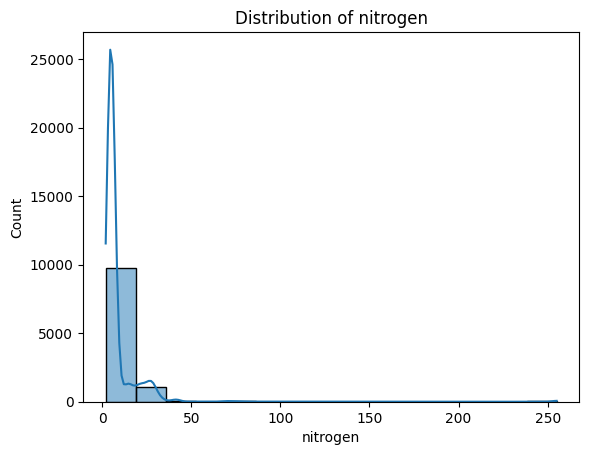

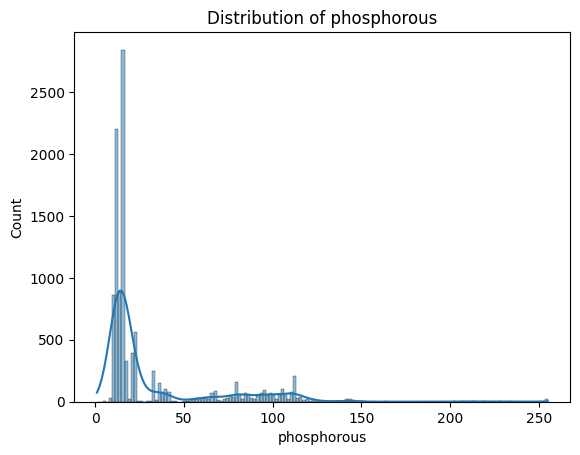

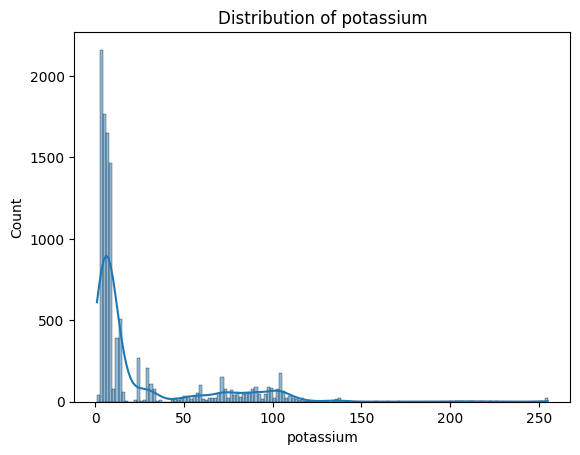

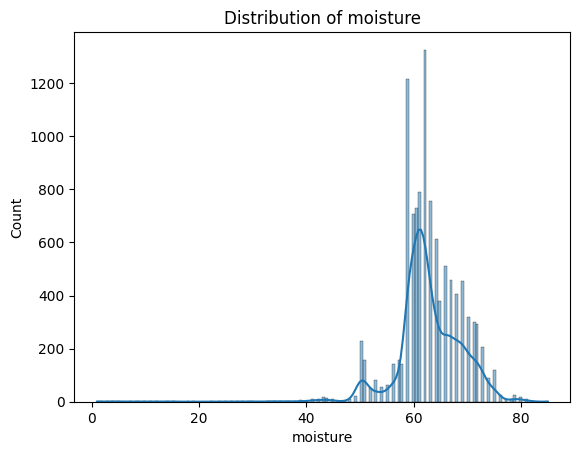

In [40]:
for col in ["nitrogen", "phosphorous", "potassium", "moisture"]:
    sns.histplot(mean_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [43]:
import numpy as np

In [44]:
# Apply np.log to all columns except the non-numeric ones (e.g., 'timestamp')
mean_data = mean_data.apply(lambda x: np.log(x + 1) if x.name != 'timestamp' else x)


c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


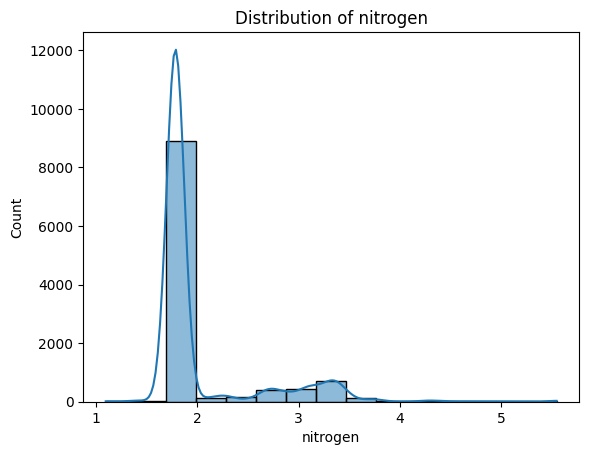

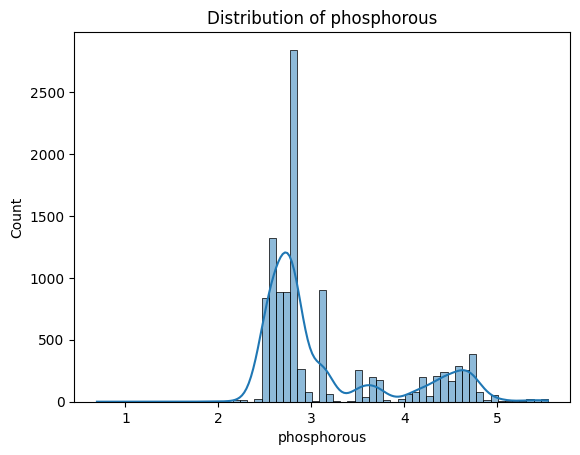

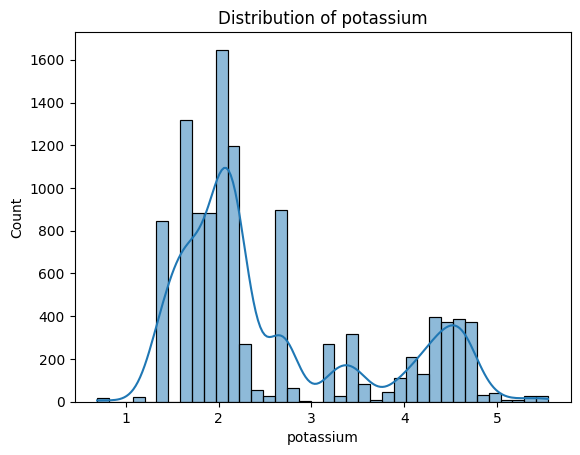

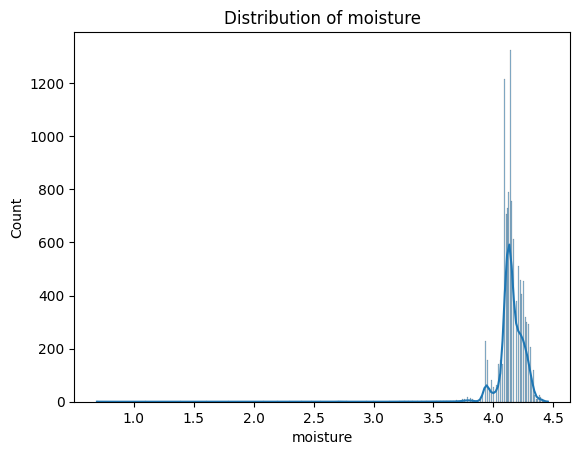

In [45]:
for col in ["nitrogen", "phosphorous", "potassium", "moisture"]:
    sns.histplot(mean_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [46]:
import numpy as np

# Define the labeling function for a nutrient
def label_soil_health(value, nutrient_type):
    if nutrient_type == 'nitrogen':
        if value < 10:
            return 'Deficient'
        elif 10 <= value <= 20:
            return 'Marginal'
        elif 21 <= value <= 30:
            return 'Adequate'
        else:
            return 'High'
    elif nutrient_type == 'phosphorous':
        if value < 3:
            return 'Deficient'
        elif 4 <= value <= 7:
            return 'Marginal'
        elif 8 <= value <= 11:
            return 'Adequate'
        else:
            return 'High'
    elif nutrient_type == 'potassium':
        if value < 60:
            return 'Deficient'
        elif 60 <= value <= 120:
            return 'Marginal'
        elif 121 <= value <= 180:
            return 'Adequate'
        else:
            return 'High'
    # Add more nutrients as needed (repeat similar structure)
    else:
        return 'Unknown'

# Apply the labeling function to each nutrient column
mean_data['soil_health_nitrogen'] = mean_data['nitrogen'].apply(lambda x: label_soil_health(x, 'nitrogen'))
mean_data['soil_health_phosphorous'] = mean_data['phosphorous'].apply(lambda x: label_soil_health(x, 'phosphorous'))
mean_data['soil_health_potassium'] = mean_data['potassium'].apply(lambda x: label_soil_health(x, 'potassium'))

# Check the resulting data
print(mean_data[['nitrogen', 'soil_health_nitrogen', 'phosphorous', 'soil_health_phosphorous', 'potassium', 'soil_health_potassium']].head())


   nitrogen soil_health_nitrogen  phosphorous soil_health_phosphorous  \
0   1.78636            Deficient     3.503734                    High   
1   1.78636            Deficient     3.503734                    High   
2   1.78636            Deficient     3.503734                    High   
3   1.78636            Deficient     3.503734                    High   
4   1.78636            Deficient     3.503734                    High   

   potassium soil_health_potassium  
0   3.236483             Deficient  
1   3.236483             Deficient  
2   3.236483             Deficient  
3   3.236483             Deficient  
4   3.236483             Deficient  


In [47]:
mean_data.head()

,air_temperature,soil_temperature,humidity,moisture,nitrogen,phosphorous,potassium,soil_health_nitrogen,soil_health_phosphorous,soil_health_potassium
0,3.397858,3.325396,3.761200,4.122963,1.78636,3.503734,3.236483,Deficient,High,Deficient
1,3.397858,3.325396,4.158883,4.122963,1.78636,3.503734,3.236483,Deficient,High,Deficient
2,3.397858,3.325396,4.158883,4.122963,1.78636,3.503734,3.236483,Deficient,High,Deficient
3,3.397858,3.325396,4.143135,4.122963,1.78636,3.503734,3.236483,Deficient,High,Deficient
4,3.397858,3.325396,4.143135,4.122963,1.78636,3.503734,3.236483,Deficient,High,Deficient


In [50]:
datas = datas.apply(lambda x: x.replace(0, x.mean()) if x.name != 'timestamp' else x)

In [51]:
datas.describe()

,air_temperature,soil_temperature,humidity,moisture,nitrogen,phosphorous,potassium
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,27.123094,23.231431,49.121594,62.785055,8.845200,32.262789,24.497405
std,2.572493,7.598374,12.655356,6.243025,14.932481,35.206542,35.670831
min,20.200000,-127.000000,32.000000,1.000000,2.000000,1.000000,1.000000
25%,26.700000,22.690000,38.000000,60.000000,4.967691,13.000000,5.000000
50%,27.100000,23.940000,47.000000,62.000000,4.967691,15.000000,7.000000
75%,27.600000,24.310000,53.000000,66.000000,4.967691,32.239342,24.444073
max,35.200000,32.810000,87.000000,85.000000,255.000000,255.000000,255.000000


In [52]:
def label_combined_soil_health(row):
    # Label based on nitrogen (example)
    if row['nitrogen'] < 10:
        nitrogen_label = 'Deficient'
    elif 10 <= row['nitrogen'] <= 20:
        nitrogen_label = 'Marginal'
    elif 21 <= row['nitrogen'] <= 30:
        nitrogen_label = 'Adequate'
    else:
        nitrogen_label = 'High'

    # Label based on phosphorus
    if row['phosphorous'] < 3:
        phosphorous_label = 'Deficient'
    elif 4 <= row['phosphorous'] <= 7:
        phosphorous_label = 'Marginal'
    elif 8 <= row['phosphorous'] <= 11:
        phosphorous_label = 'Adequate'
    else:
        phosphorous_label = 'High'

    # Label based on potassium
    if row['potassium'] < 60:
        potassium_label = 'Deficient'
    elif 60 <= row['potassium'] <= 120:
        potassium_label = 'Marginal'
    elif 121 <= row['potassium'] <= 180:
        potassium_label = 'Adequate'
    else:
        potassium_label = 'High'

    # Label based on moisture (you can define ranges here based on your domain knowledge)
    if row['moisture'] < 100:
        moisture_label = 'Low'
    elif 100 <= row['moisture'] <= 300:
        moisture_label = 'Adequate'
    else:
        moisture_label = 'High'

    # Label based on temperature (example ranges)
    if row['air_temperature'] < 15:
        air_temp_label = 'Low'
    elif 15 <= row['air_temperature'] <= 25:
        air_temp_label = 'Optimal'
    else:
        air_temp_label = 'High'
    
    if row['soil_temperature'] < 10:
        soil_temp_label = 'Low'
    elif 10 <= row['soil_temperature'] <= 30:
        soil_temp_label = 'Optimal'
    else:
        soil_temp_label = 'High'
    
    # Combine all labels to create a final soil health label
    # You can create a more sophisticated approach here, this is a simplified example:
    if nitrogen_label == 'Deficient' or phosphorous_label == 'Deficient' or potassium_label == 'Deficient' or moisture_label == 'Low' or air_temp_label == 'Low' or soil_temp_label == 'Low':
        return 'Poor Soil Health'
    elif nitrogen_label == 'Adequate' and phosphorous_label == 'Adequate' and potassium_label == 'Adequate' and moisture_label == 'Adequate' and air_temp_label == 'Optimal' and soil_temp_label == 'Optimal':
        return 'Good Soil Health'
    else:
        return 'Moderate Soil Health'

# Apply the function to create labels for each row
datas['soil_health_label'] = datas.apply(label_combined_soil_health, axis=1)

# # Check the first few rows of the labeled data
# print(mean_data[['soil_health_label', 'air_temperature', 'soil_temperature', 'moisture', 'nitrogen', 'phosphorous', 'potassium']].head())


In [53]:
datas.head()

,air_temperature,soil_temperature,humidity,moisture,nitrogen,phosphorous,potassium,soil_health_label
0,28.9,26.81,42.0,60.741917,4.967691,32.239342,24.444073,Poor Soil Health
1,28.9,26.81,63.0,60.741917,4.967691,32.239342,24.444073,Poor Soil Health
2,28.9,26.81,63.0,60.741917,4.967691,32.239342,24.444073,Poor Soil Health
3,28.9,26.81,62.0,60.741917,4.967691,32.239342,24.444073,Poor Soil Health
4,28.9,26.81,62.0,60.741917,4.967691,32.239342,24.444073,Poor Soil Health


In [54]:
datas['soil_health_label'].value_counts()

soil_health_label
Poor Soil Health    11000
Name: count, dtype: int64

In [56]:
from sklearn.utils import resample

# Combine the original data with the labels
mean_data_balanced = datas.copy()

# Separate the majority and minority classes
majority_class = mean_data_balanced[mean_data_balanced['soil_health_label'] == 'Poor Soil Health']
minority_class = mean_data_balanced[mean_data_balanced['soil_health_label'] != 'Poor Soil Health']


In [57]:
print(minority_class.shape)  # Check the number of rows in the minority class
print(minority_class['soil_health_label'].value_counts())  # Check how many instances of each label


(0, 8)
Series([], Name: count, dtype: int64)


In [58]:
# Example thresholds (adjust these based on your research paper)
mean_data_balanced['soil_health_label'] = 'Poor Soil Health'  # Default category

mean_data_balanced.loc[
    (mean_data_balanced['nitrogen'] >= 20) & 
    (mean_data_balanced['phosphorous'] >= 10) & 
    (mean_data_balanced['potassium'] >= 120), 'soil_health_label'] = 'Good Soil Health'

mean_data_balanced.loc[
    (mean_data_balanced['nitrogen'] >= 10) & 
    (mean_data_balanced['phosphorous'] >= 5) & 
    (mean_data_balanced['potassium'] >= 60), 'soil_health_label'] = 'Moderate Soil Health'


In [59]:
print(mean_data_balanced['soil_health_label'].value_counts())


soil_health_label
Poor Soil Health        9193
Moderate Soil Health    1807
Name: count, dtype: int64


In [60]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = mean_data_balanced[mean_data_balanced['soil_health_label'] == 'Poor Soil Health']
minority_class = mean_data_balanced[mean_data_balanced['soil_health_label'] == 'Moderate Soil Health']

# Upsample minority class
minority_class_upsampled = resample(minority_class,
                                    replace=True,    # Sample with replacement
                                    n_samples=len(majority_class),  # Match majority class size
                                    random_state=42)  # For reproducibility

# Combine the majority and upsampled minority classes
mean_data_balanced = pd.concat([majority_class, minority_class_upsampled])

# Check the distribution of the target variable after upsampling
print(mean_data_balanced['soil_health_label'].value_counts())


soil_health_label
Poor Soil Health        9193
Moderate Soil Health    9193
Name: count, dtype: int64


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features (X) and target (y)
X = mean_data_balanced.drop(columns=['soil_health_label'])
y = mean_data_balanced['soil_health_label']

# Convert categorical labels to numerical (e.g., 'Good', 'Moderate', 'Poor' -> 0, 1, 2)
y = y.map({'Poor Soil Health': 0, 'Moderate Soil Health': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1847
           1       1.00      1.00      1.00      1831

    accuracy                           1.00      3678
   macro avg       1.00      1.00      1.00      3678
weighted avg       1.00      1.00      1.00      3678



In [69]:
import pickle

In [70]:
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [64]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [1.         1.         1.         1.         0.91215665]
Average cross-validation score: 0.9824313298884961


In [65]:
y_pred = cross_val_predict(rf, X, y, cv=5)
misclassified = X[y != y_pred]
print(misclassified)


       air_temperature  soil_temperature  humidity  moisture  nitrogen  \
8816              30.2             27.13      75.0      72.0       9.0   
8817              30.2             27.19      75.0      69.0       9.0   
8818              30.2             27.19      75.0      72.0       9.0   
8819              30.2             27.13      75.0      69.0       9.0   
8820              30.2             27.13      75.0      69.0       9.0   
...                ...               ...       ...       ...       ...   
10868             29.8             27.75      64.0      57.0       4.0   
10869             29.8             27.81      61.0      57.0       4.0   
10870             29.8             27.81      64.0      57.0       4.0   
10871             29.8             27.81      63.0      61.0       4.0   
10894             29.8             28.12      64.0      63.0      91.0   

       phosphorous  potassium  
8816          69.0       61.0  
8817          68.0       61.0  
8818          6